In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [125]:
data = pd.read_excel("health care diabetes.xlsx")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [126]:
data.shape

(768, 9)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [128]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [129]:
print('Glucose-', data['Glucose'].mean())
print('BloodPressure-', data['BloodPressure'].mean())
print('SkinThickness-', data['SkinThickness'].mean())
print('Insulin-', data['Insulin'].mean())
print('BMI-', data['BMI'].mean())

Glucose- 120.89453125
BloodPressure- 69.10546875
SkinThickness- 20.536458333333332
Insulin- 79.79947916666667
BMI- 31.992578124999998


In [130]:
# Finding the number of rows which has the null values
print('Glucose-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin-',len(data['Insulin'][data['Insulin']==0]))
print('BMI-',len(data['BMI'][data['BMI']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374
BMI- 11


In [131]:
# Finding the null value percentage
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']
null_percentage = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64


In [132]:
data['Glucose'].replace(0, data['Glucose'].mean(), inplace = True)
data['BloodPressure'].replace(0, data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].replace(0, data['SkinThickness'].mean(), inplace = True)
data['Insulin'].replace(0, data['Insulin'].mean(), inplace = True)
data['BMI'].replace(0, data['BMI'].mean(), inplace = True)

In [133]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [134]:
null_percentage = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64


In [135]:
columns = data[selected_columns]
type(columns)

pandas.core.frame.DataFrame

In [136]:
columns.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

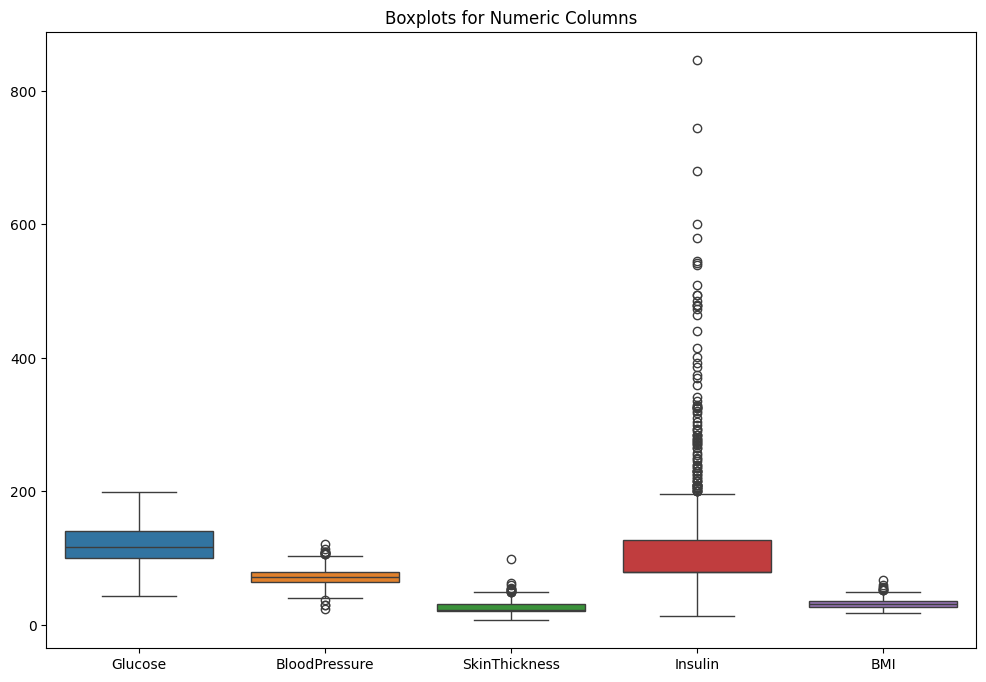

In [137]:
# Display boxplots for numeric columns to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [138]:
# Finding the Outlier Count in the selected Columns:
def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    # Count the number of outliers
    count_outliers = len(outliers)

    return count_outliers

# Calculate and print the number of outliers for each column of interest
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89
Number of outliers in the 'BMI' column: 8


In [139]:
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [140]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(688, 9)
(768, 9)


In [141]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

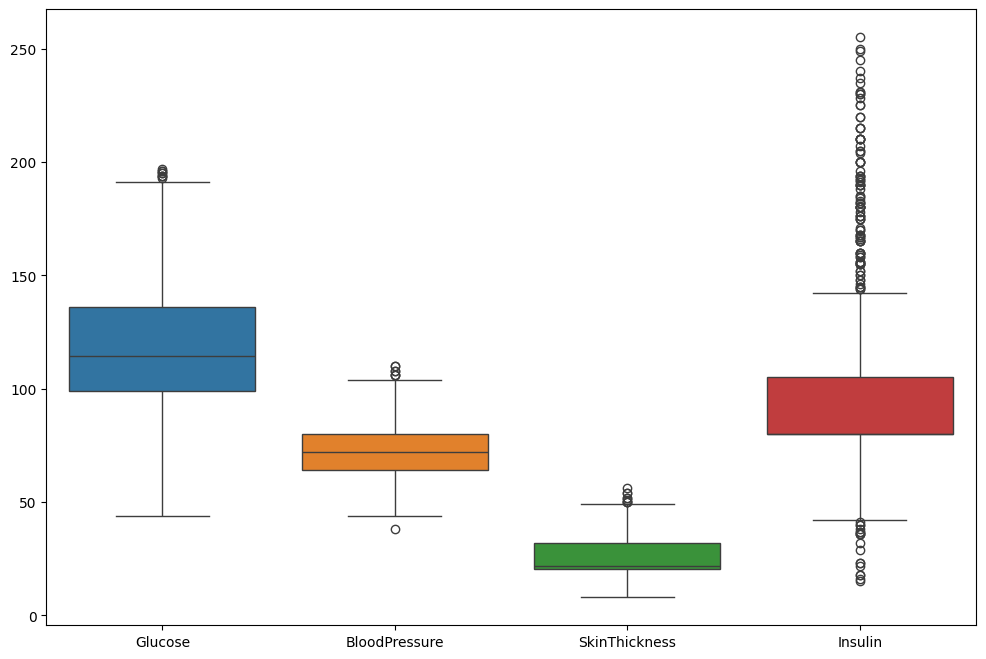

In [142]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=col)
plt.show()

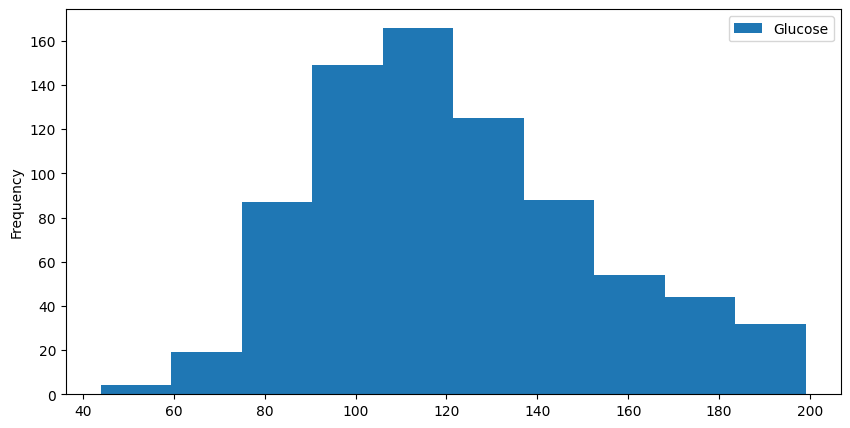

In [143]:
data['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

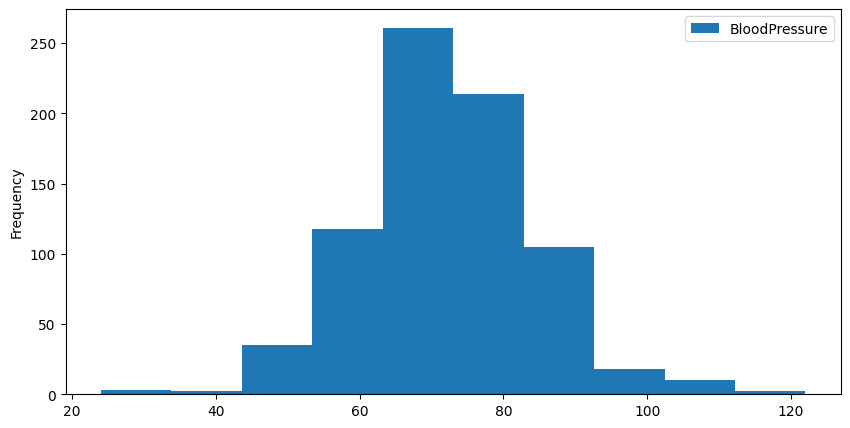

In [144]:
data['BloodPressure'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

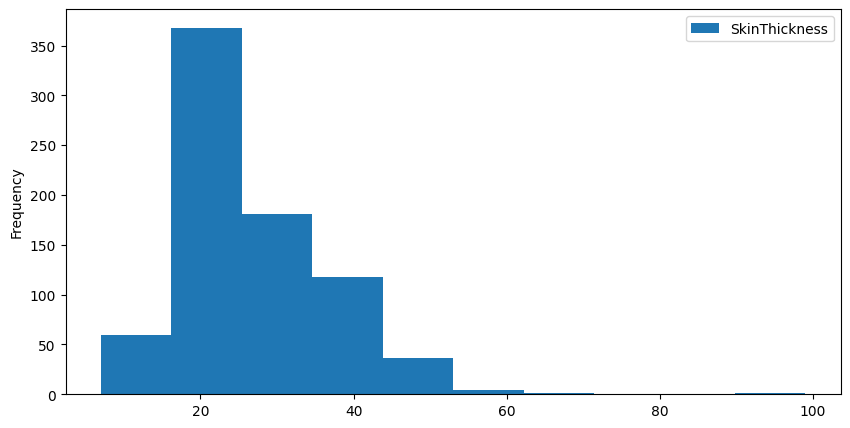

In [145]:
data['SkinThickness'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

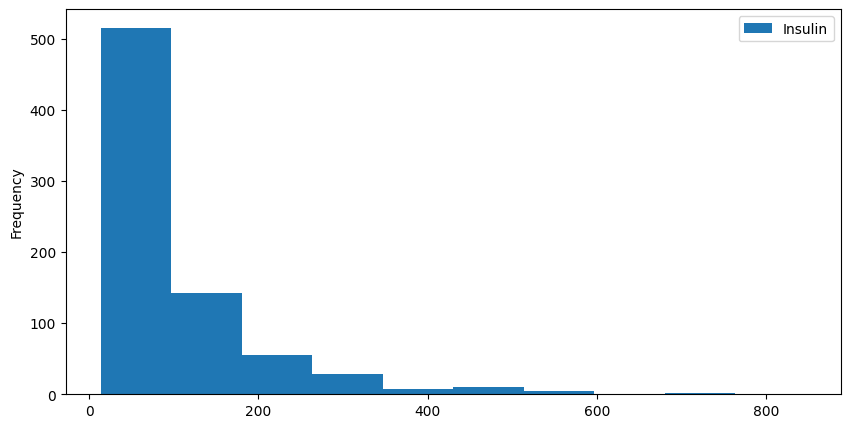

In [146]:
data['Insulin'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

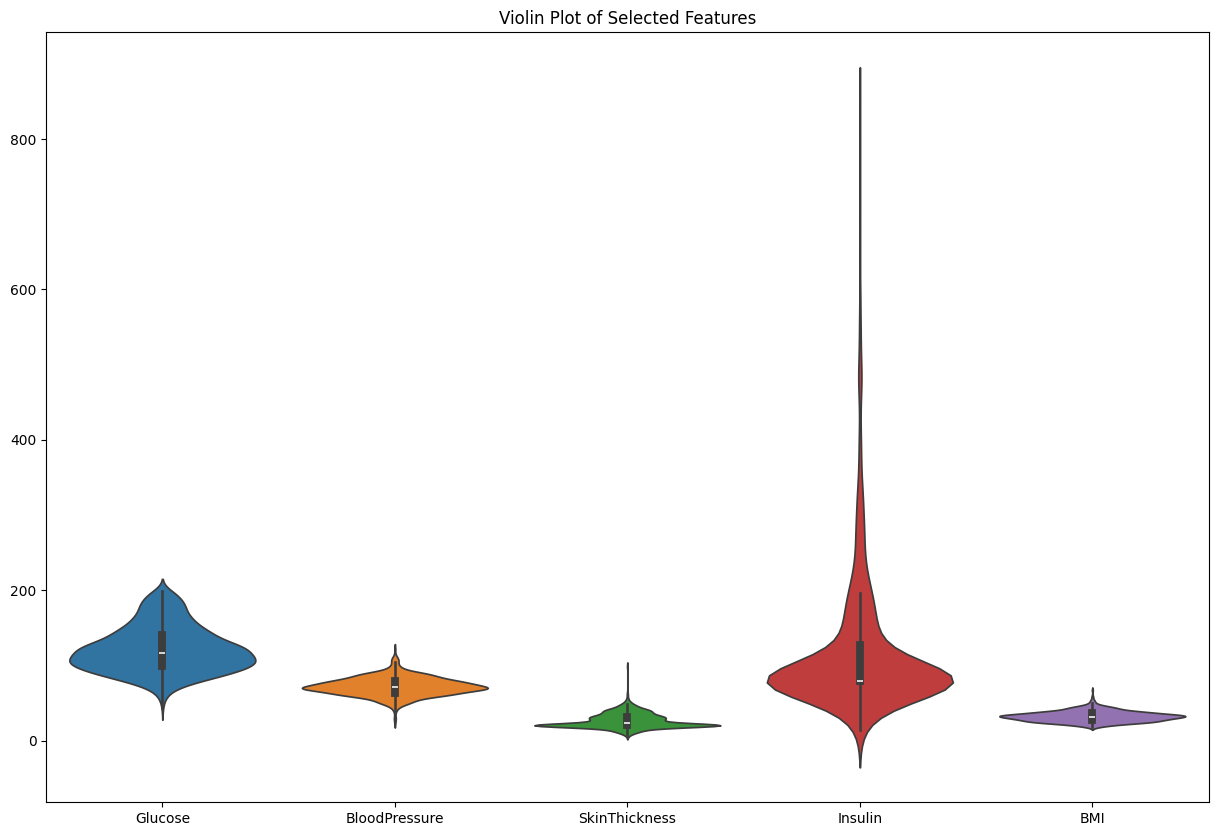

In [147]:
plt.figure(figsize=(15, 10))
sns.violinplot(data=data[selected_columns])
plt.title("Violin Plot of Selected Features")
plt.show()

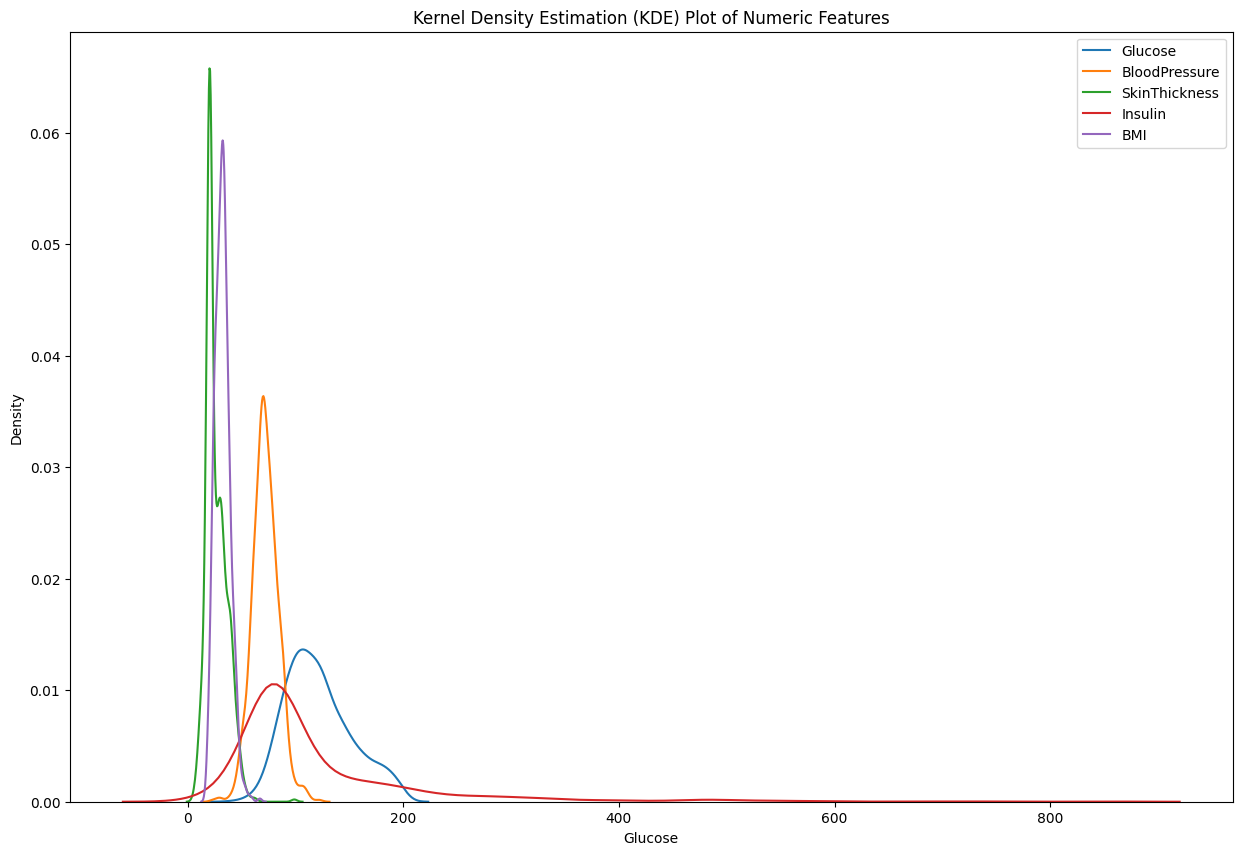

In [148]:
plt.figure(figsize=(15, 10))
for column in selected_columns:
    sns.kdeplot(data[column], label=column)
plt.title("Kernel Density Estimation (KDE) Plot of Numeric Features")
plt.legend()
plt.show()

In [149]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [150]:
data.dtypes.value_counts()

float64    6
int64      3
dtype: int64

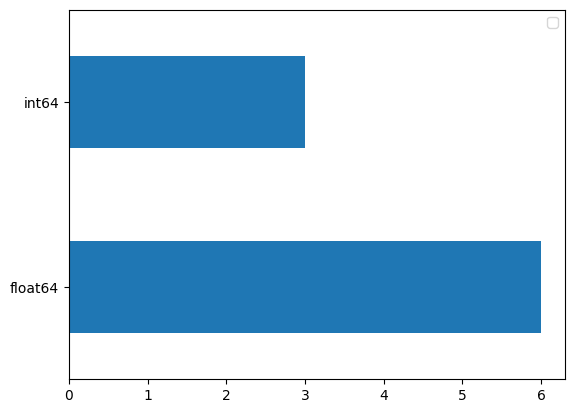

In [151]:
figsize=(16,2)
data.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

In [152]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

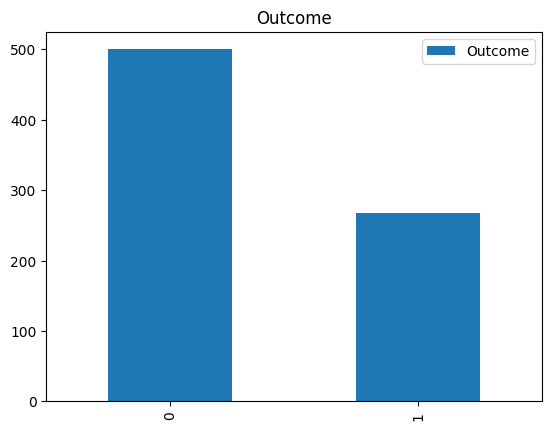

In [153]:
data['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')
plt.show()

In [154]:
outcome = (data['Outcome'].value_counts()/data['Outcome'].shape) * 100
outcome

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [155]:
balanced_data=100-outcome
balanced_data

0    34.895833
1    65.104167
Name: Outcome, dtype: float64

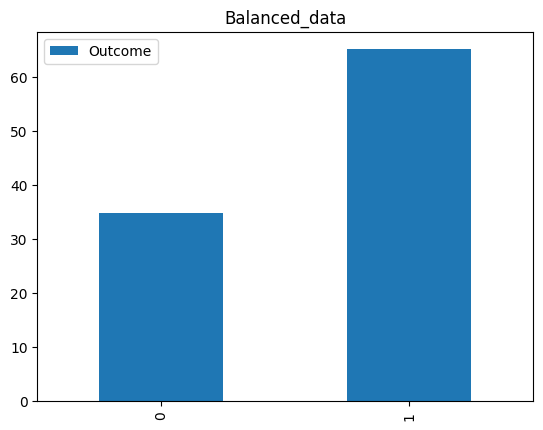

In [156]:
balanced_data.plot(kind='bar')
plt.legend()
plt.title('Balanced_data')
plt.show()

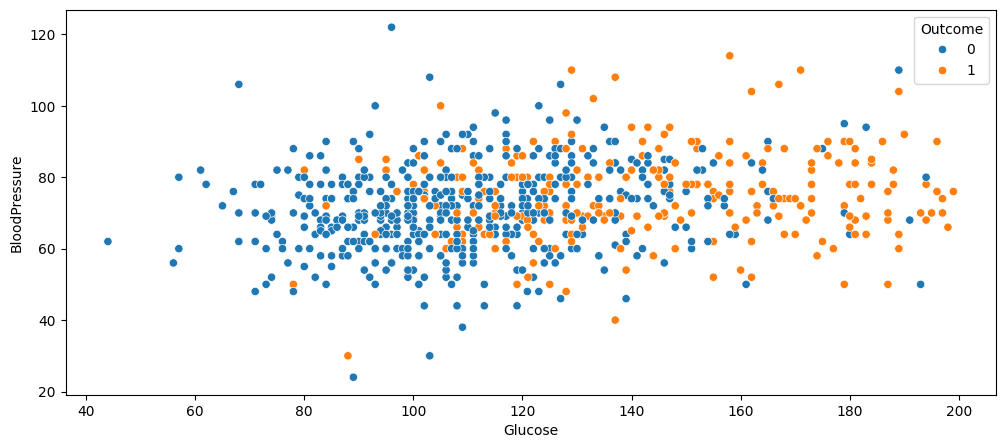

In [157]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

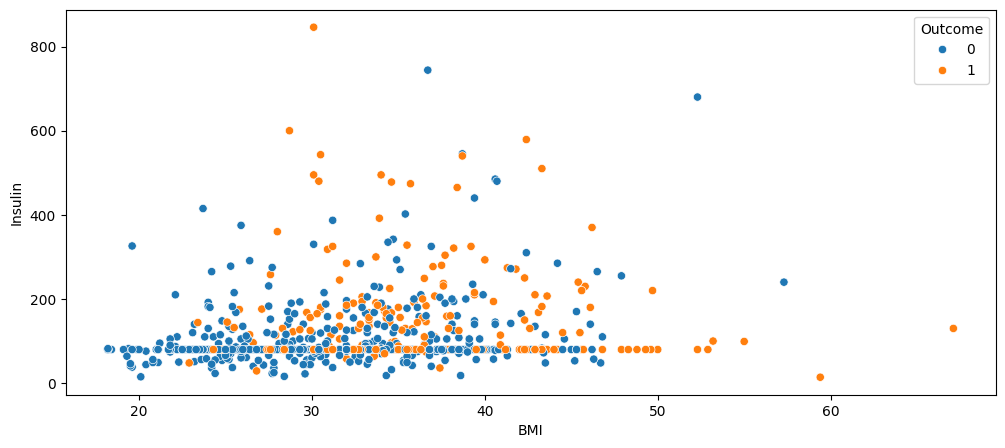

In [158]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI',y='Insulin',hue='Outcome',data=data)
plt.show()

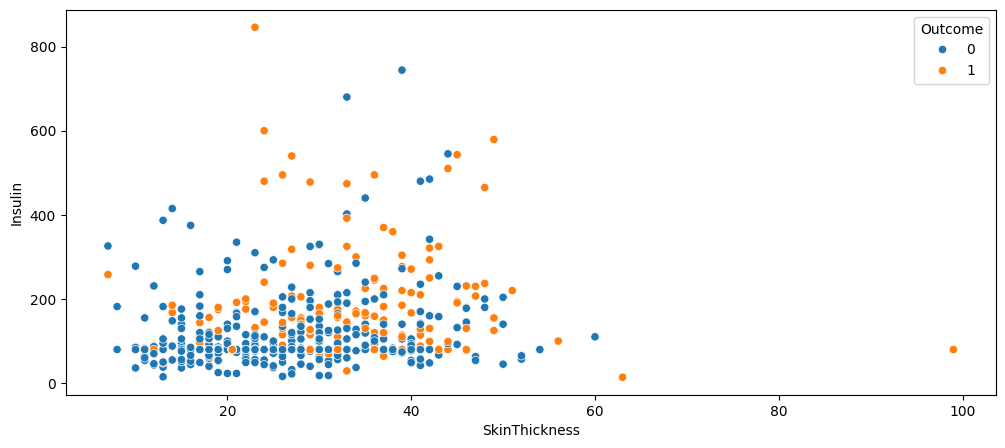

In [159]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=data)
plt.show()

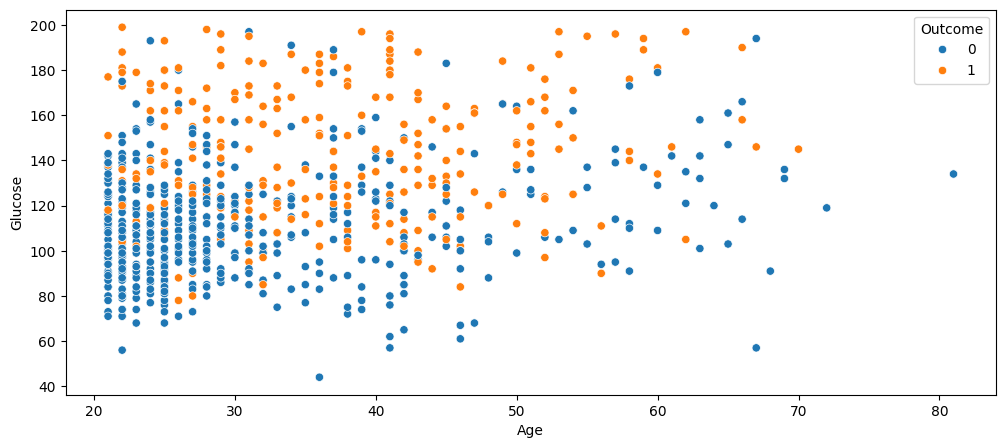

In [160]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age',y='Glucose',hue='Outcome',data=data)
plt.show()

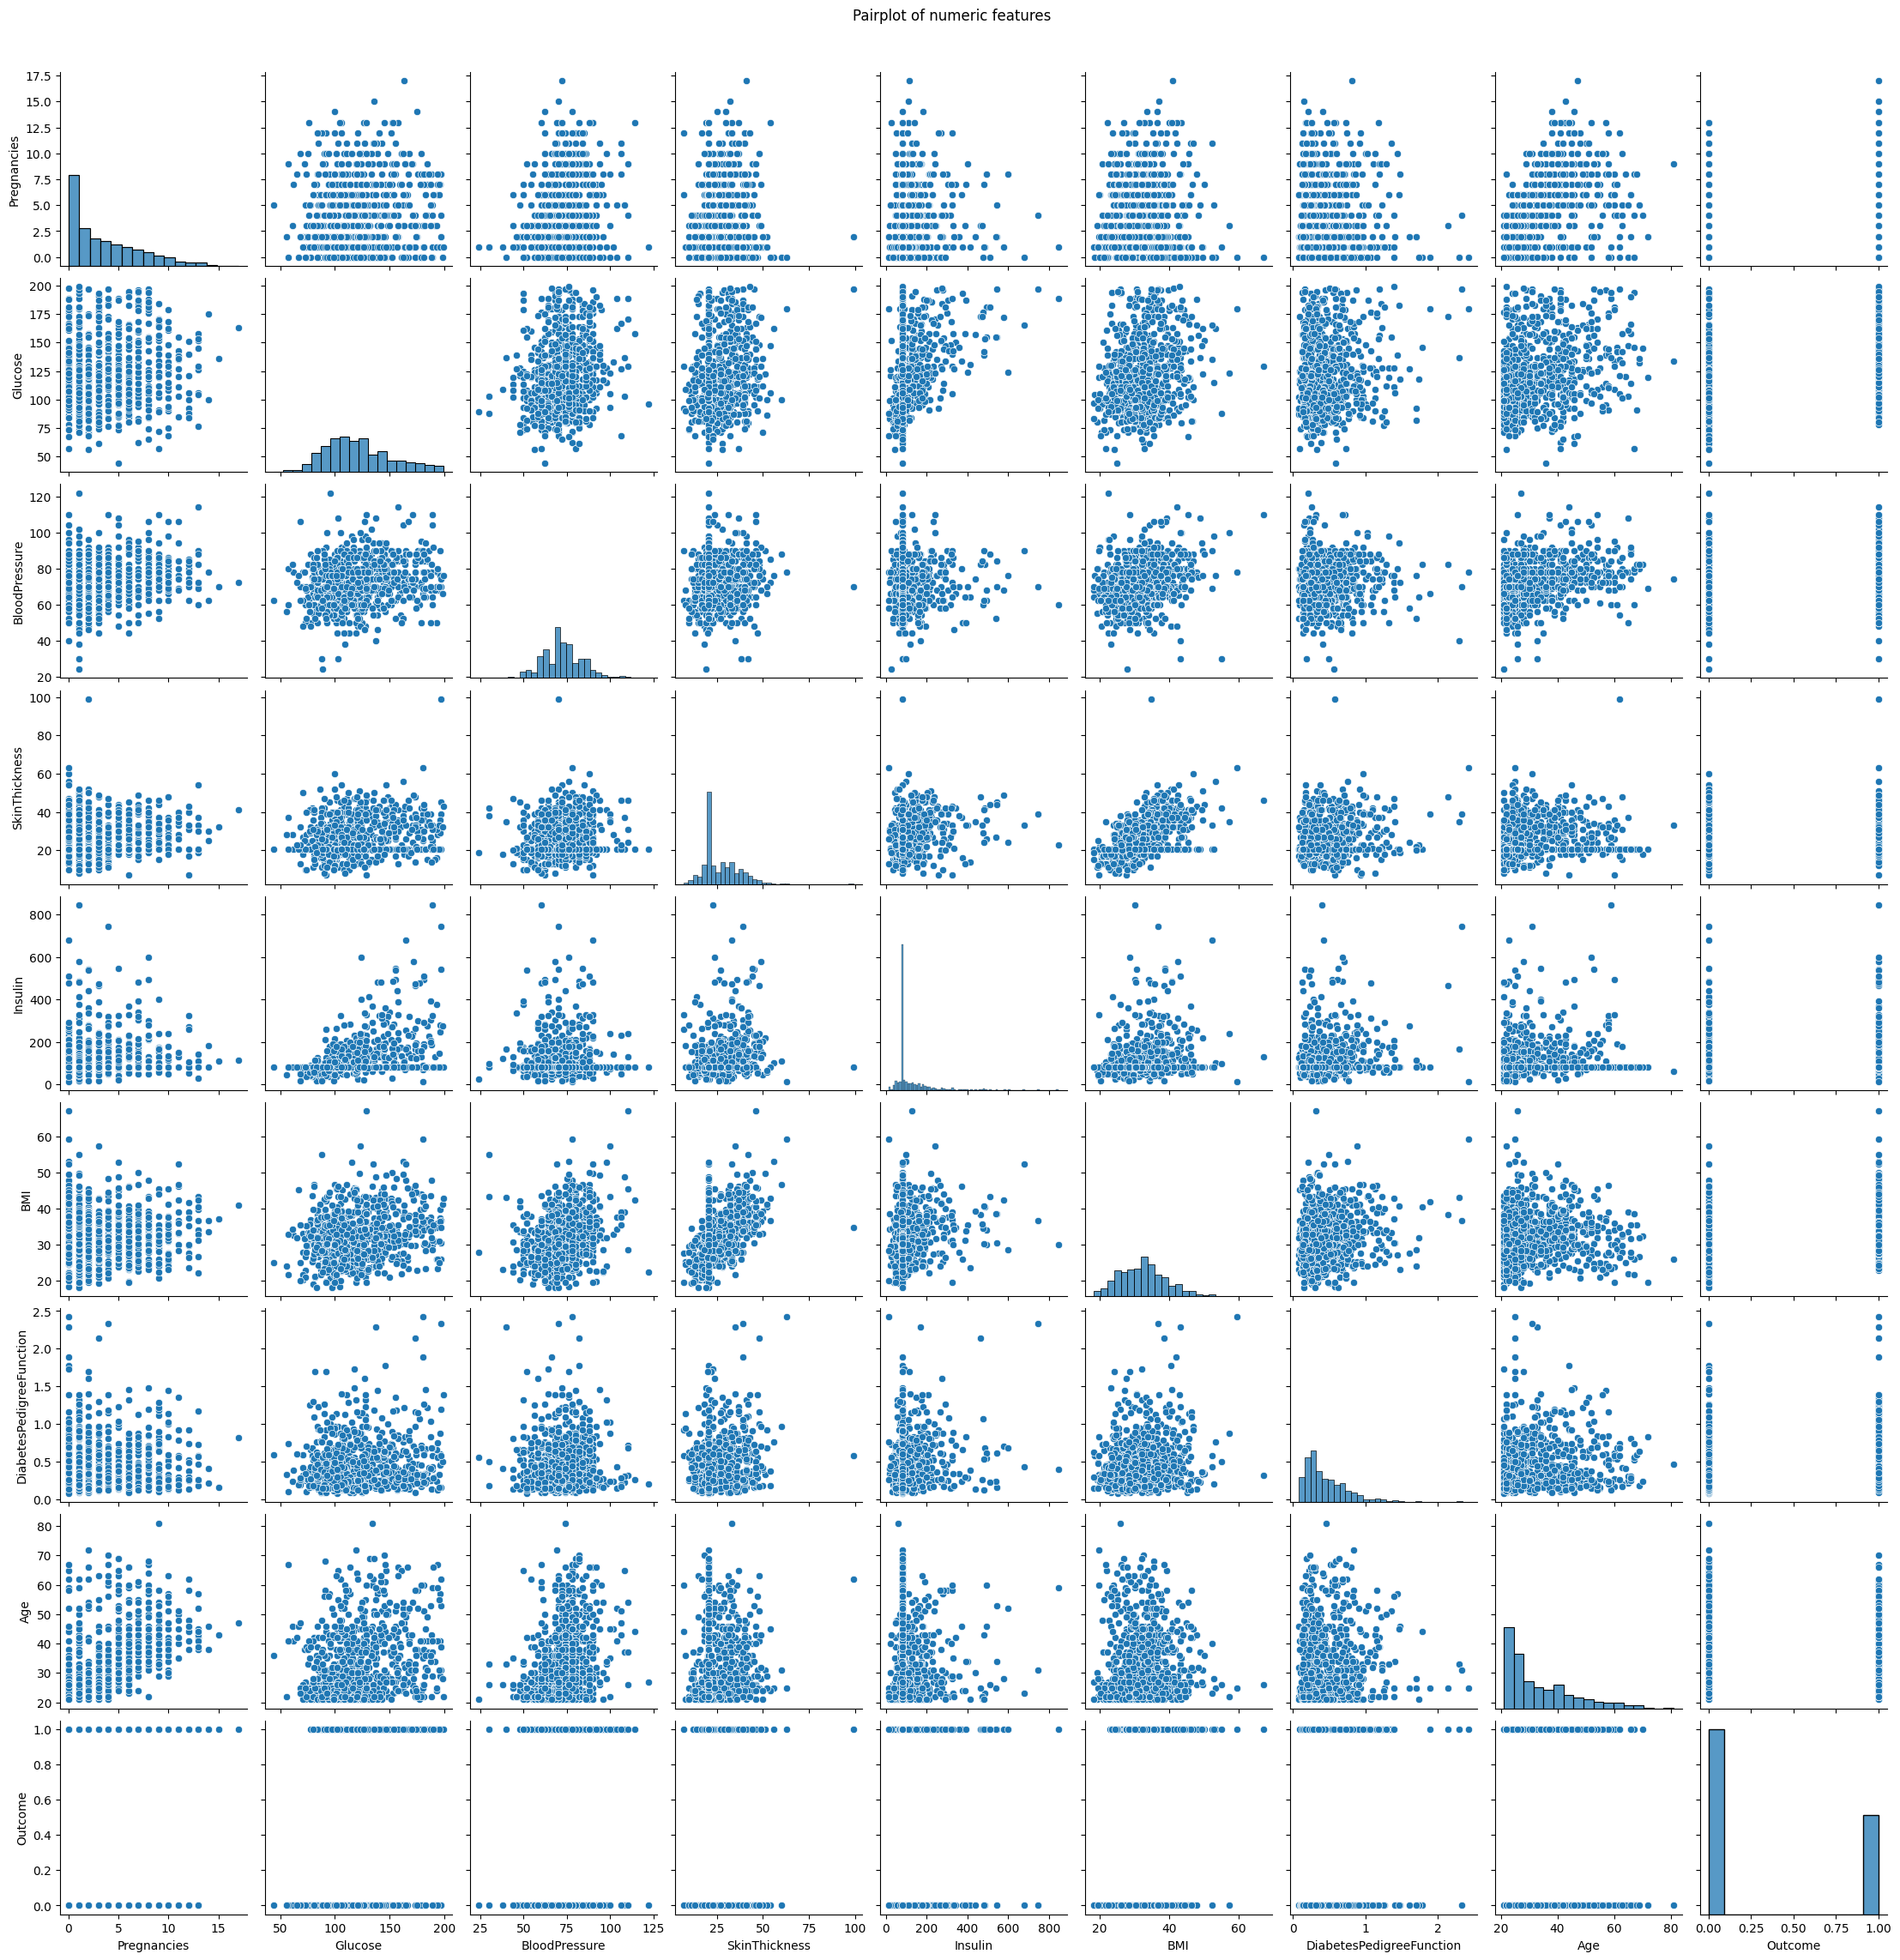

In [161]:
sns.pairplot(data)
plt.suptitle("Pairplot of numeric features", y = 1.02)
plt.show()

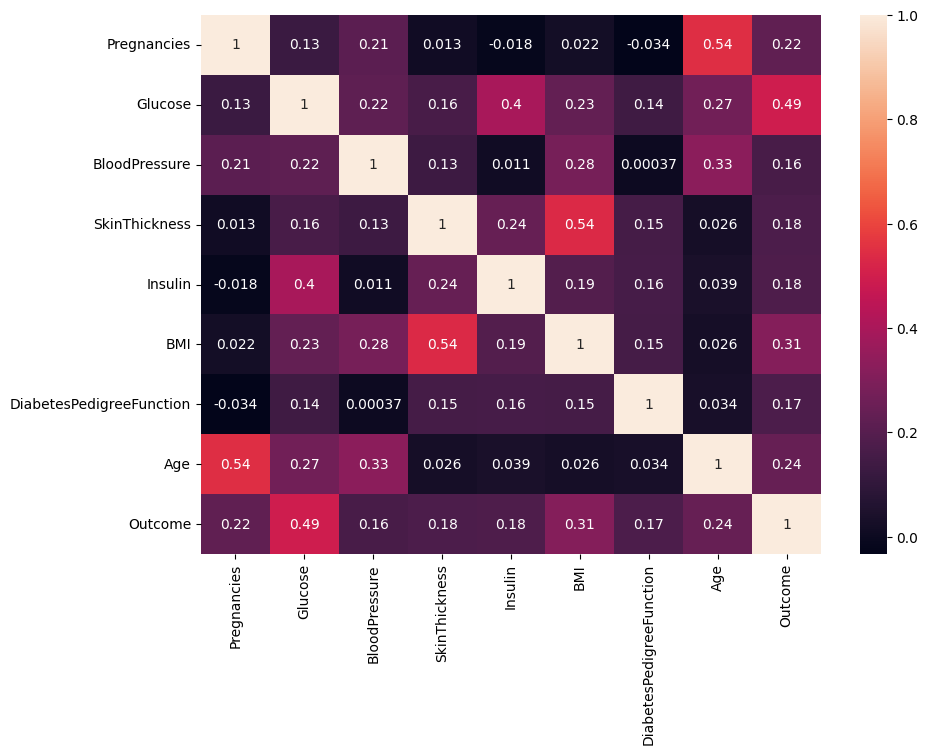

In [162]:
plt.figure(figsize = (10, 7))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [163]:
# Data preparation for modelling
X = data.drop(['Outcome'], axis = 1)
y = data.Outcome

In [164]:
# Finding the correlation of every feature with the outcome (Target Variable)
data.corrwith(data['Outcome'])

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.312254
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [165]:
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(8,'Score'))


                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.937867
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


In [166]:
fit.scores_

array([ 111.51969064, 1418.66063574,   41.39466535,   81.91762154,
       1798.08868209,  108.93786733,    5.39268155,  181.30368904])

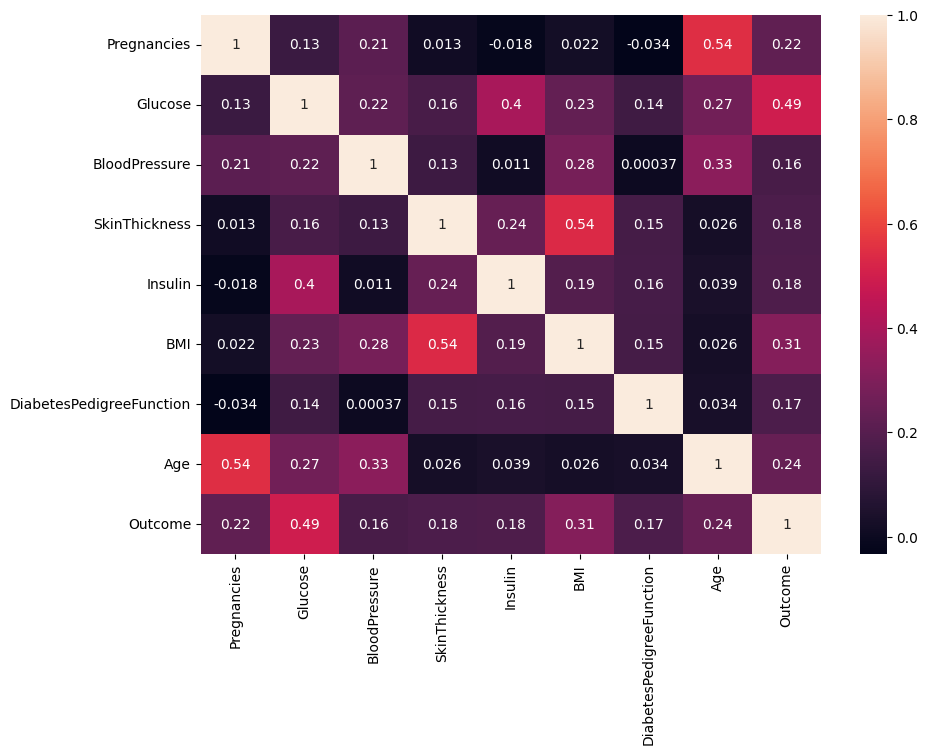

In [167]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [168]:
new_x = data.drop(['Outcome', 'BloodPressure'], axis = 1).values
new_y = data.Outcome.values

In [169]:
trainx,testx,trainy,testy = train_test_split(new_x,new_y,test_size=0.2,random_state=10)

In [170]:
print("Before OverSampling, counts of label '1': {}".format(sum(trainy==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy==0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=63)
trainx_res, trainy_res = sm.fit_resample(trainx, trainy.ravel())
print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(trainy_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(trainy_res==0)))

Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 405 

After OverSampling, the shape of train_X: (810, 7)
After OverSampling, the shape of train_y: (810,) 

After OverSampling, counts of label '1': 405
After OverSampling, counts of label '0': 405


In [171]:
logreg = LogisticRegression(solver='liblinear', random_state=123)

In [172]:
logreg.fit(trainx_res, trainy_res)

LogisticRegression(random_state=123, solver='liblinear')

In [173]:
prediction = logreg.predict(testx)

In [174]:
print("Accurace score - ", accuracy_score(testy, prediction))
print("Precision score - ", mean_squared_error(testy, prediction))

Accurace score -  0.7207792207792207
Precision score -  0.2792207792207792


In [175]:
print(confusion_matrix(testy, prediction))

[[69 26]
 [17 42]]


In [176]:
print(classification_report(testy, prediction))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        95
           1       0.62      0.71      0.66        59

    accuracy                           0.72       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.72      0.72       154



AUC: 0.839


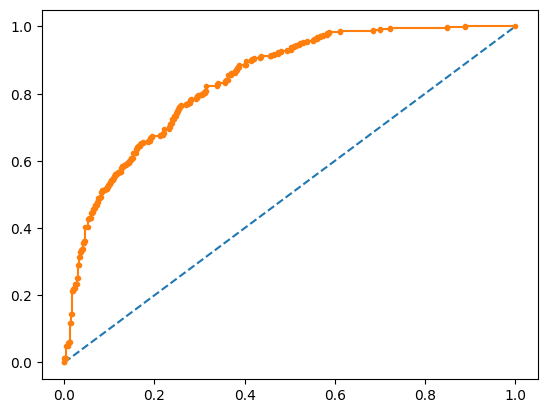

In [177]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = logreg.predict_proba(trainx_res)
probs = probs[:, 1]

auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [178]:
rf = RandomForestClassifier(random_state=42, max_depth=5)

In [179]:
rf.fit(trainx_res, trainy_res)

RandomForestClassifier(max_depth=5, random_state=42)

In [180]:
rf_predict = rf.predict(testx)

In [181]:
print("Accurace score - ", accuracy_score(testy, rf_predict))
print("Precision score - ", mean_squared_error(testy, rf_predict))

Accurace score -  0.7597402597402597
Precision score -  0.24025974025974026


In [182]:
param_grid = {'n_estimators': [100, 400, 200, 300], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3], 'min_samples_split': [2, 4, 3], 'min_samples_leaf': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3], 'max_samples': [2, 4, 3]}

In [183]:
grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, verbose = 2, n_jobs = -1)

In [184]:
rf_grid = RandomForestClassifier(criterion = "gini", max_depth = 2, max_leaf_nodes = 3, max_samples = 4, min_samples_leaf = 1, min_samples_split = 3, n_estimators = 400, random_state = 42)

In [185]:
rf_grid.fit(trainx_res, trainy_res)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, max_samples=4,
                       min_samples_split=3, n_estimators=400, random_state=42)

In [186]:
rf_grid_predict = rf_grid.predict(testx)

In [187]:
print("Accurace score - ", accuracy_score(testy, rf_grid_predict))
print("Precision score - ", mean_squared_error(testy, rf_grid_predict))

Accurace score -  0.7337662337662337
Precision score -  0.2662337662337662


In [188]:
print(confusion_matrix(testy, rf_grid_predict))

[[65 30]
 [11 48]]


In [189]:
print(classification_report(testy, rf_grid_predict))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        95
           1       0.62      0.81      0.70        59

    accuracy                           0.73       154
   macro avg       0.74      0.75      0.73       154
weighted avg       0.76      0.73      0.74       154



AUC: 0.839


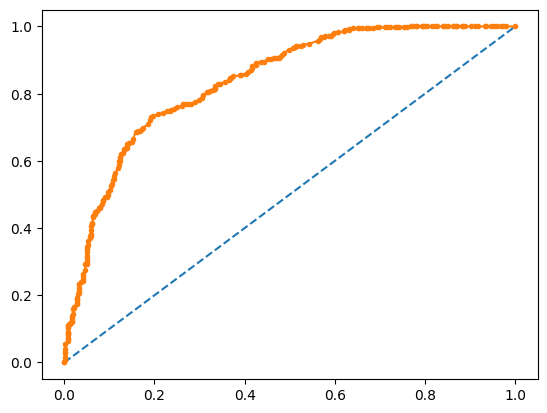

In [190]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = rf_grid.predict_proba(trainx_res)
probs = probs[:, 1]

auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [191]:
dc = DecisionTreeClassifier(random_state=42)

In [192]:
dc.fit(trainx_res, trainy_res)

DecisionTreeClassifier(random_state=42)

In [193]:
dc_predict = dc.predict(testx)

In [194]:
print("Accurace score - ", accuracy_score(testy, dc_predict))
print("Mean Squared Error - ", mean_squared_error(testy, dc_predict))

Accurace score -  0.6233766233766234
Mean Squared Error -  0.37662337662337664


In [195]:
dc_param_grid = {'splitter' : ["best", "random"], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3], 'min_samples_split': [1, 2, 3], 'min_samples_leaf': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3]}

In [196]:
import warnings
warnings.filterwarnings('ignore')
dc_grid = GridSearchCV(estimator = dc, param_grid = dc_param_grid, cv = 5, verbose = 2, n_jobs = -1)
dc_grid.fit(trainx_res, trainy_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=2)

In [197]:
dc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [198]:
dc_final = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, max_leaf_nodes = 4, min_samples_leaf = 1, min_samples_split = 2, splitter = 'best', random_state = 42)

In [199]:
dc_final.fit(trainx_res, trainy_res)
dc_final_predict = dc_final.predict(testx)

In [200]:
print("Accurace score - ", accuracy_score(testy, dc_final_predict))
print("Mean Squared Error - ", mean_squared_error(testy, dc_final_predict))

Accurace score -  0.6883116883116883
Mean Squared Error -  0.3116883116883117


In [201]:
print(confusion_matrix(testy, dc_final_predict))

[[73 22]
 [26 33]]


In [202]:
print(classification_report(testy, dc_final_predict))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.60      0.56      0.58        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.68      0.69      0.69       154



AUC: 0.792


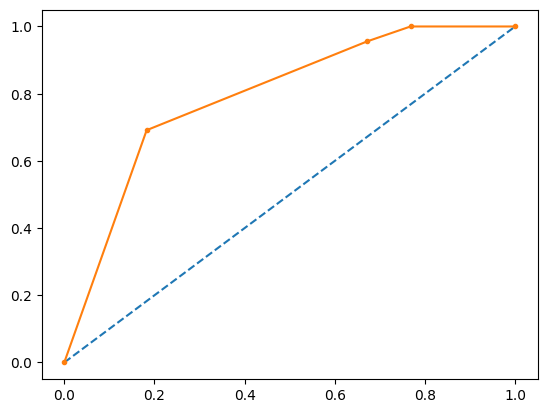

In [203]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = dc_final.predict_proba(trainx_res)
probs = probs[:, 1]

auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [204]:
from sklearn.neighbors import KNeighborsClassifier

In [205]:
knn = KNeighborsClassifier(n_neighbors=4)

In [206]:
knn.fit(trainx_res, trainy_res)

KNeighborsClassifier(n_neighbors=4)

In [207]:
knn_pred = knn.predict(testx)

In [208]:
print("Accurace score - ", accuracy_score(testy, knn_pred))
print("Mean Squared Error - ", mean_squared_error(testy, knn_pred))

Accurace score -  0.6233766233766234
Mean Squared Error -  0.37662337662337664


In [209]:
print(confusion_matrix(testy, knn_pred))

[[68 27]
 [31 28]]


In [210]:
print(classification_report(testy, knn_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70        95
           1       0.51      0.47      0.49        59

    accuracy                           0.62       154
   macro avg       0.60      0.60      0.60       154
weighted avg       0.62      0.62      0.62       154



AUC: 0.951


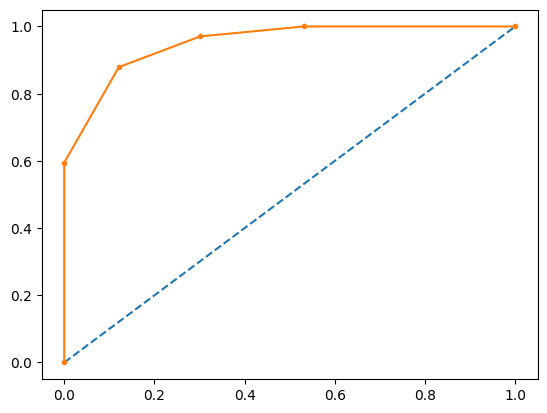

In [211]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = knn.predict_proba(trainx_res)
probs = probs[:, 1]

auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [212]:
from tensorflow import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=7))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [213]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [214]:
model.fit(trainx_res, trainy_res, epochs=100, batch_size = 32)

Epoch 1/100
26/26 [==============================] - 1s 4ms/step - loss: 1.8410 - accuracy: 0.4951
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5321
Epoch 3/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5519
Epoch 4/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.5617
Epoch 5/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.5778
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6576 - accuracy: 0.5951
Epoch 7/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6049
Epoch 8/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.6148
Epoch 9/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6616 - accuracy: 0.6049
Epoch 10/100
26/26 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.6049
Epoch 11/

In [215]:
model.evaluate(testx, testy)

5/5 [==============================] - 0s 4ms/step - loss: 0.6266 - accuracy: 0.6299


[0.6266158223152161, 0.6298701167106628]

In [216]:
model_pred = model.predict(testx)
model_pred = (model_pred > 0.5)

5/5 [==============================] - 0s 3ms/step


In [217]:
print("Accurace score - ", accuracy_score(testy, model_pred))
print("Mean Squared Error - ", mean_squared_error(testy, model_pred))

Accurace score -  0.6298701298701299
Mean Squared Error -  0.37012987012987014


In [218]:
print(confusion_matrix(testy, model_pred))

[[57 38]
 [19 40]]


In [219]:
print(classification_report(testy, model_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        95
           1       0.51      0.68      0.58        59

    accuracy                           0.63       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.66      0.63      0.63       154



26/26 [==============================] - 0s 2ms/step
AUC: 0.832


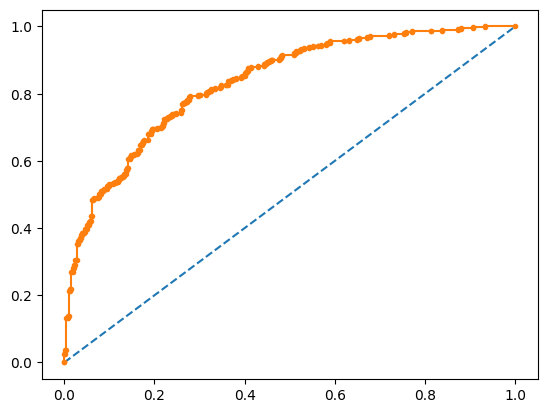

In [220]:
probs = model.predict(trainx_res)
probs = probs[:, 0]

auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [221]:
from sklearn.svm import SVC

svc = SVC(probability=True, random_state=42)

In [222]:
svc.fit(trainx_res, trainy_res)

SVC(probability=True, random_state=42)

In [223]:
svc_pred = svc.predict(testx)

In [224]:
print("Accurace score - ", accuracy_score(testy, svc_pred))
print("Mean Squared Error - ", mean_squared_error(testy, svc_pred))

Accurace score -  0.7077922077922078
Mean Squared Error -  0.2922077922077922


In [225]:
print(confusion_matrix(testy, svc_pred))

[[70 25]
 [20 39]]


In [226]:
print(classification_report(testy, svc_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        95
           1       0.61      0.66      0.63        59

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.71      0.71      0.71       154



AUC: 0.836


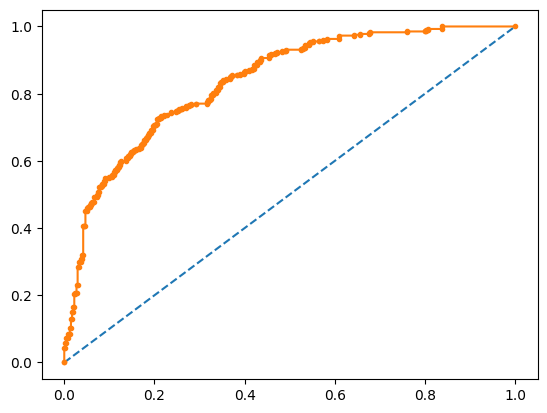

In [227]:
probs = svc.predict_proba(trainx_res)
probs = probs[:, 1]

auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [228]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(trainx_res, trainy_res)
nb_pred = nb.predict(testx)

In [229]:
print("Accurace score - ", accuracy_score(testy, nb_pred))
print("Mean Squared Error - ", mean_squared_error(testy, nb_pred))

Accurace score -  0.7077922077922078
Mean Squared Error -  0.2922077922077922


In [230]:
print(confusion_matrix(testy, nb_pred))

[[74 21]
 [24 35]]


In [231]:
print(classification_report(testy, nb_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        95
           1       0.62      0.59      0.61        59

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



AUC: 0.817


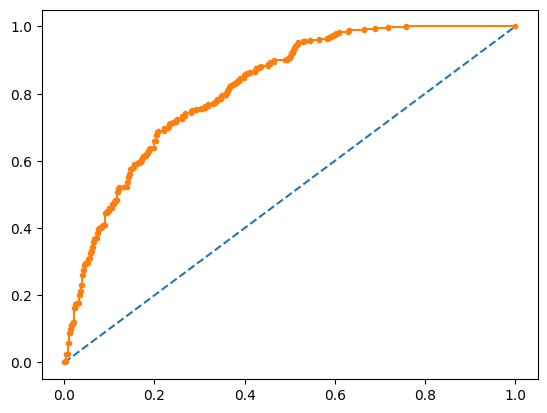

In [232]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = nb.predict_proba(trainx_res)
probs = probs[:, 1]

auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [233]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)
ada.fit(trainx_res, trainy_res)
ada_pred = ada.predict(testx)

In [234]:
print("Accurace score - ", accuracy_score(testy, ada_pred))
print("Mean Squared Error - ", mean_squared_error(testy, ada_pred))

Accurace score -  0.7467532467532467
Mean Squared Error -  0.2532467532467532


In [235]:
print(confusion_matrix(testy, ada_pred))

[[72 23]
 [16 43]]


In [236]:
print(classification_report(testy, ada_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        95
           1       0.65      0.73      0.69        59

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.75      0.75      0.75       154



AUC: 0.926


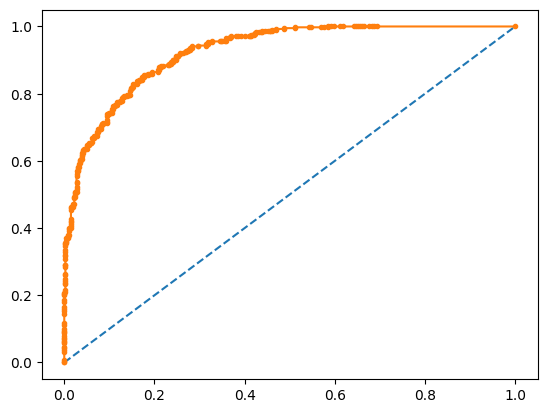

In [237]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = ada.predict_proba(trainx_res)
probs = probs[:, 1]

auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(trainy_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [238]:
Algorithms = ['KNN', 'Random Forest', 'Decision Tree', 'logreg', 'Neural Network', 'SVC', 'Naive Bayes', 'AdaBoost']
Accuracy_score = [accuracy_score(testy, knn_pred), accuracy_score(testy, rf_grid_predict), accuracy_score(testy, dc_final_predict), accuracy_score(testy, prediction), accuracy_score(testy, model_pred), accuracy_score(testy, svc_pred), accuracy_score(testy, nb_pred), accuracy_score(testy, ada_pred)]
accuracy_df = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy_score': Accuracy_score})

print(accuracy_df)

        Algorithm  Accuracy_score
0             KNN        0.623377
1   Random Forest        0.733766
2   Decision Tree        0.688312
3          logreg        0.720779
4  Neural Network        0.629870
5             SVC        0.707792
6     Naive Bayes        0.707792
7        AdaBoost        0.746753


In [239]:
from sklearn.model_selection import cross_val_score

logreg_cv = LogisticRegression(solver='liblinear', random_state=123)
dt_cv = DecisionTreeClassifier(random_state=123)
knn_cv = KNeighborsClassifier()
rf_cv = RandomForestClassifier(random_state=123)
svc_cv = SVC(probability=True, random_state=123)
bayes_cv = GaussianNB()
adaboost_cv = AdaBoostClassifier(random_state=123)
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'KNN', 3: 'Random Forest', 4: 'Neural Network', 5: 'SVC', 6: 'Naive Bayes', 7: 'AdaBoost'}
cnn_models = [logreg_cv, dt_cv, knn_cv, rf_cv, model, svc_cv, bayes_cv, adaboost_cv]

for i, model in enumerate(cnn_models):
    if i == 4:
        if isinstance(model, keras.models.Model):
            model.fit(trainx_res, trainy_res, epochs = 10, verbose=0)
            scores = model.evaluate(testx, testy, verbose=0)
            print("{} Test Accuracy: {}".format(cv_dict[i], scores[1]))
    else:
        print("{} Test Accuracy: {}".format(cv_dict[i], cross_val_score(model, trainx_res, trainy_res, cv=10, scoring='accuracy').mean()))

Logistic Regression Test Accuracy: 0.7370370370370369
Decision Tree Test Accuracy: 0.7814814814814816
KNN Test Accuracy: 0.7703703703703704
Random Forest Test Accuracy: 0.819753086419753
Neural Network Test Accuracy: 0.6038960814476013
SVC Test Accuracy: 0.7444444444444444
Naive Bayes Test Accuracy: 0.7308641975308641
AdaBoost Test Accuracy: 0.7592592592592593


In [240]:
# Model with the best accuracy score
best_model = accuracy_df[accuracy_df['Accuracy_score'] == accuracy_df['Accuracy_score'].max()]
best_model

,Algorithm,Accuracy_score
7,AdaBoost,0.746753


In [241]:
# Model with the worst accuracy score
worst_model = accuracy_df[accuracy_df['Accuracy_score'] == accuracy_df['Accuracy_score'].min()]
worst_model

,Algorithm,Accuracy_score
0,KNN,0.623377
